In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [ ]:
DATADIR = r"/content/drive/MyDrive/deep learning/images"
categories = ["mattar_paneer","beetroot_halwa","bhindi_fry", "chicken_biryani", "chicken_lollipop",
              "dal_makhani", "egg_burji", "jalebi", "jeera_aloo", "kaju_katli", 
              "palak_paneer", "Parotta", "poori", "rasgulla", "vada"]
training_data = []
def create_train():
    for cat in categories:
        path = os.path.join(DATADIR,cat)
        class_num = categories.index(cat)
        for img in os.listdir(path):
            try:
                img_a = load_img(os.path.join(DATADIR,cat,img))
                img_array = img_to_array(img_a)
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
create_train()

In [ ]:
X = []
y = []
for feat,label in training_data:
    X.append(feat)
    y.append(label)
X = np.array(X)
X/=255
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=69)

In [ ]:
data_augmentation = models.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(200, 200, 3)),
    layers.experimental.preprocessing.RandomRotation((-0.2, 0.3)),
])

rescale_ = models.Sequential([
    layers.experimental.preprocessing.Resizing(200, 200, input_shape=[None,None,3]),
])

lossFN = 'sparse_categorical_crossentropy'
optimizerFN = tf.keras.optimizers.Adam(learning_rate=0.001)

cnn = models.Sequential([

    rescale_,

    data_augmentation,
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Dropout(0.3),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),

    layers.Dropout(0.35),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),

    layers.Dropout(0.3),

    layers.Dense(256,activation = 'relu'),

    layers.Dropout(0.2),

    layers.Dense(64,activation = 'relu'),
    
    layers.Dense(15, activation='softmax')
])
cnn.compile(optimizer=optimizerFN,
              loss= lossFN,
              metrics=['accuracy'])

In [ ]:
history = cnn.fit(X_train,y_train,batch_size = 32, validation_split = 0.05, epochs=200)


Epoch 1/200
73/73 [==============================] - 7s 86ms/step - loss: 2.7348 - accuracy: 0.0856 - val_loss: 2.5619 - val_accuracy: 0.1382
Epoch 2/200
73/73 [==============================] - 6s 81ms/step - loss: 2.4595 - accuracy: 0.1550 - val_loss: 2.3892 - val_accuracy: 0.1870
Epoch 3/200
73/73 [==============================] - 6s 81ms/step - loss: 2.3757 - accuracy: 0.1742 - val_loss: 2.3472 - val_accuracy: 0.2276
Epoch 4/200
73/73 [==============================] - 6s 82ms/step - loss: 2.3355 - accuracy: 0.1926 - val_loss: 2.2696 - val_accuracy: 0.2439
Epoch 5/200
73/73 [==============================] - 6s 82ms/step - loss: 2.2659 - accuracy: 0.2235 - val_loss: 2.1824 - val_accuracy: 0.2439
Epoch 6/200
73/73 [==============================] - 6s 82ms/step - loss: 2.1437 - accuracy: 0.2667 - val_loss: 2.0987 - val_accuracy: 0.2764
Epoch 7/200
73/73 [==============================] - 6s 82ms/step - loss: 2.0267 - accuracy: 0.2971 - val_loss: 1.9917 - val_accuracy: 0.3984
Epoch 

In [ ]:
#history = cnn.fit(X_train,y_train,batch_size = 32, validation_split = 0.05, epochs=50,verbose = 0)

In [ ]:
cnn.evaluate(X_train, y_train)

77/77 [==============================] - 2s 31ms/step - loss: 0.2557 - accuracy: 0.9248


[0.25566959381103516, 0.9247661828994751]

In [ ]:
cnn.evaluate(X_test, y_test)

14/14 [==============================] - 1s 56ms/step - loss: 1.5583 - accuracy: 0.6636


[1.558274745941162, 0.6635944843292236]

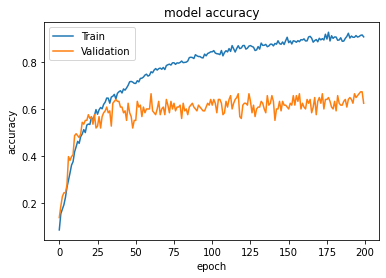

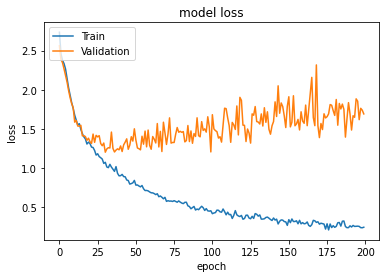

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

14/14 [==============================] - 1s 35ms/step
0.6668881065120668


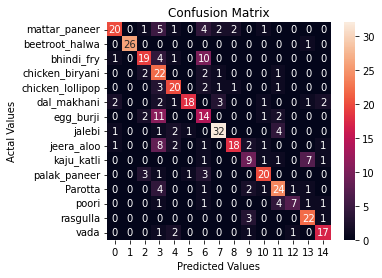

Values of:  mattar_paneer
precision:  0.8
recall:  0.5555555555555556
f-score:  0.6557377049180328
support 36
i = 0
Values of:  beetroot_halwa
precision:  1.0
recall:  0.9629629629629629
f-score:  0.9811320754716981
support 27
i = 1
Values of:  bhindi_fry
precision:  0.7037037037037037
recall:  0.5428571428571428
f-score:  0.6129032258064516
support 35
i = 2
Values of:  chicken_biryani
precision:  0.3492063492063492
recall:  0.7857142857142857
f-score:  0.48351648351648346
support 28
i = 3
Values of:  chicken_lollipop
precision:  0.6896551724137931
recall:  0.7142857142857143
f-score:  0.7017543859649122
support 28
i = 4
Values of:  dal_makhani
precision:  0.9
recall:  0.6
f-score:  0.7200000000000001
support 30
i = 5
Values of:  egg_burji
precision:  0.358974358974359
recall:  0.4666666666666667
f-score:  0.40579710144927544
support 30
i = 6
Values of:  jalebi
precision:  0.8205128205128205
recall:  0.7804878048780488
f-score:  0.8
support 41
i = 7
Values of:  jeera_aloo
precision:  0

In [ ]:
from sklearn.metrics import f1_score, precision_recall_fscore_support, confusion_matrix
import pandas as pd
import seaborn as sns

y_pred = np.argmax(cnn.predict(X_test), axis=-1)

print(f1_score(y_test, y_pred, average="macro"))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=categories)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
for i in range(len(categories)):
  print("Values of: ", categories[i])
  print("precision: ",precision_recall_fscore_support(y_test, y_pred)[0][i])
  print("recall: ",precision_recall_fscore_support(y_test, y_pred)[1][i])
  print("f-score: ", precision_recall_fscore_support(y_test, y_pred)[2][i])
  print("support", precision_recall_fscore_support(y_test, y_pred)[3][i])
  print("i =",i)
  print("="*10)